**Nama  : Edmundus Gigih Galih Poetra**

**Kompi : 22**

**SC ID : SC62213**

# Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
from collections import Counter
from imblearn.over_sampling import SMOTE
from pandas import ExcelFile
from scipy import stats
from sklearn.model_selection import cross_val_score, learning_curve, train_test_split, GridSearchCV, LearningCurveDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Startup Campus/heart.csv')
data

Mounted at /content/drive


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#Data Information

1. age = Usia
2. sex = Jenis kelamin
3. cp = Jenis nyeri dada (4 nilai) = Rentang 0 - 3 seberapa nyeri dada pasien
4. trestbps = Tekanan darah saat istirahat (Satuan dalam mmHg )
5. chol = Kadar Kolestrol serum dalam mg/dl
6. fbs = Gula darah puasa > 120 mg/dl ? (1 = Ya, 0 = Tidak)
7. restecg = Hasil elektrokardiografi setelah istirahat (nilai 0,1,2)
8. thalach = Detak jantung maksimum yang dicapai
9. exang = Mengalami angin setelah berolahraga? (1= Ya, 0 = Tidak)
10. oldpeak = Depresi Segmen ST yang disbebakan oleh olahraga relatif terhadap istirahat
11. slope = Gradien/Kemiringan Segmen ST
12. ca = Jumlah pembuluh darah utama (0-3) yang diwarnai dengan flourosopi
13. thal = Penyakit Menurun/Genetik Thalasemia : 1 = normal; 2 = cacat ; 3 = cacat yang dapat diperbaiki(carrier)
14. target = 1(Ada Penyakit Jantung) / 0(Tidak Ada Penyakit Jantung)

# Data Preprocessing

## Handling Missing Value

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Dari Output di atas, didapati bahwa data tidak memiliki missing value atau data yang tidak tersedia sehingga bisa dilanjutkan ke proses selanjutnya

## Handling Duplicate Value

In [ ]:
duplicates=data.duplicated()
data_akhir=data.drop_duplicates()
print(data_akhir)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3       0  
1        0   0     3     

Dari output di atas, didapati sudah tidak terdapat duplikasi dalam data Health Case Study

## Handling Outlier Value

Data yang akan saya cek untuk melihat apakah terdapat outlier atau tidak yaitu data age, trestbps, chol, thalach, dan oldpeak

### Memeriksa Outlier pada Data Age

<Axes: ylabel='age'>

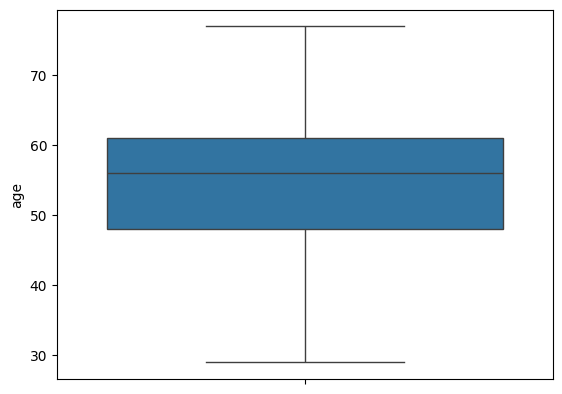

In [ ]:
sns.boxplot(data['age'])

### Memeriksa Outlier pada Data Trestbps

<Axes: ylabel='trestbps'>

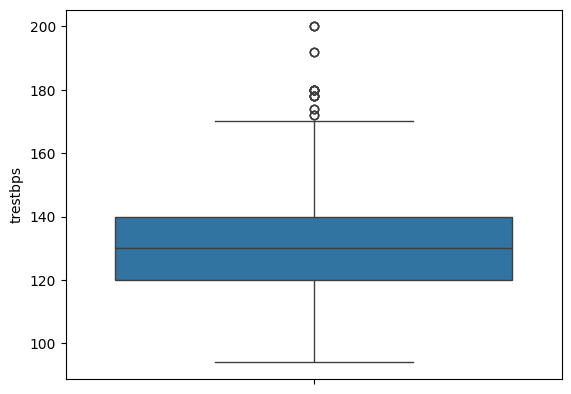

In [ ]:
sns.boxplot(data['trestbps'])

In [ ]:
Q1= np.percentile(data_akhir['trestbps'],25)
Q3= np.percentile(data_akhir['trestbps'],75)
IQR=Q3-Q1
IQR

20.0

In [ ]:
lower_limit = data_akhir['trestbps']<=(Q1-1.5*IQR)
upper_limit = data_akhir['trestbps']>=(Q3+1.5*IQR)

In [ ]:
# Outlier
data_akhir[lower_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
# Outlier
data_akhir[upper_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
29,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
47,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
65,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
70,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
87,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
135,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
203,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1


In [ ]:
data_akhir=data_akhir[~lower_limit&~upper_limit]
data_akhir

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<Axes: ylabel='trestbps'>

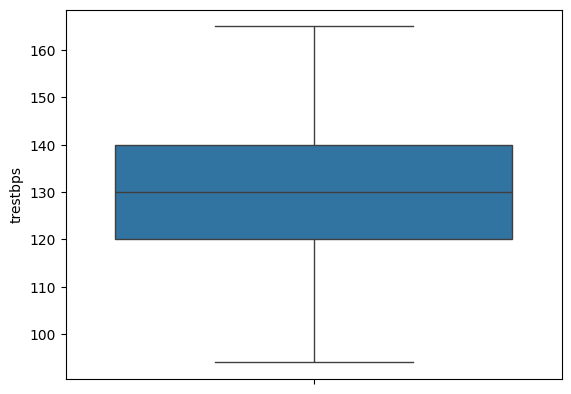

In [ ]:
sns.boxplot(data_akhir['trestbps'])

### Memeriksa Outlier pada Data Chol

<Axes: ylabel='chol'>

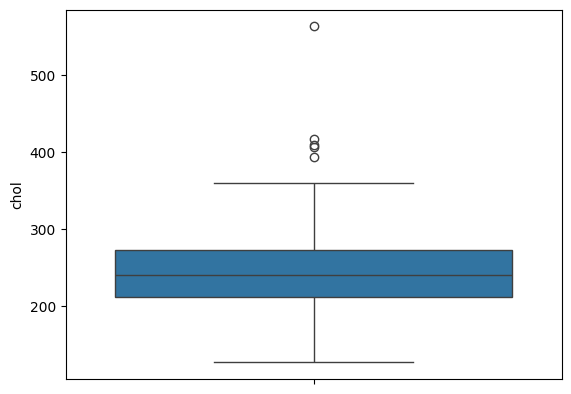

In [ ]:
sns.boxplot(data_akhir['chol'])

In [ ]:
Q1= np.percentile(data_akhir['chol'],25)
Q3= np.percentile(data_akhir['chol'],75)
IQR=Q3-Q1
IQR

62.0

In [ ]:
lower_limit = data_akhir['chol']<=(Q1-1.5*IQR)
upper_limit = data_akhir['chol']>=(Q3+1.5*IQR)

In [ ]:
# Outlier
data_akhir[lower_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
# Outlier
data_akhir[upper_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
255,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0


In [ ]:
data_akhir=data_akhir[~lower_limit&~upper_limit]
data_akhir

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<Axes: ylabel='chol'>

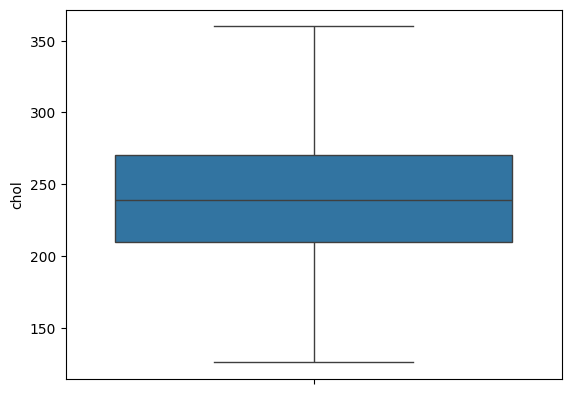

In [ ]:
sns.boxplot(data_akhir['chol'])

### Memeriksa Outlier pada Data Thalach

<Axes: ylabel='thalach'>

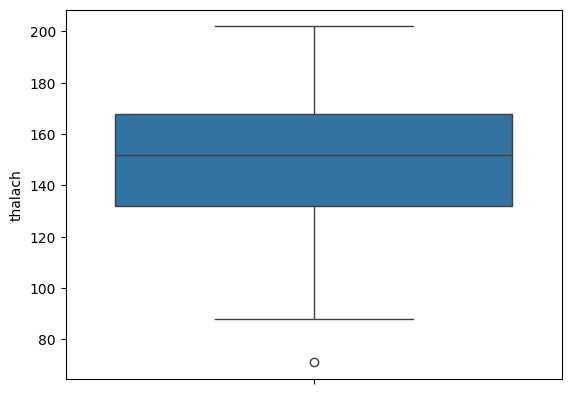

In [ ]:
sns.boxplot(data_akhir['thalach'])

In [ ]:
Q1= np.percentile(data_akhir['thalach'],25)
Q3= np.percentile(data_akhir['thalach'],75)
IQR=Q3-Q1
IQR

36.0

In [ ]:
lower_limit = data_akhir['thalach']<=(Q1-1.5*IQR)
upper_limit = data_akhir['thalach']>=(Q3+1.5*IQR)

In [ ]:
# Outlier
data_akhir[lower_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
267,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [ ]:
# Outlier
data_akhir[upper_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
data_akhir=data_akhir[~lower_limit&~upper_limit]
data_akhir

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<Axes: ylabel='thalach'>

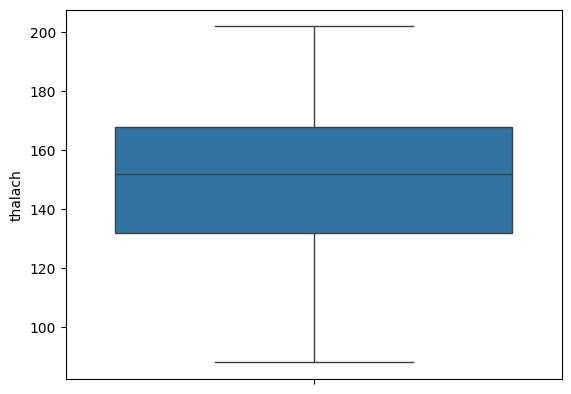

In [ ]:
sns.boxplot(data_akhir['thalach'])

### Memeriksa Outlier pada Data Oldpeak

<Axes: ylabel='oldpeak'>

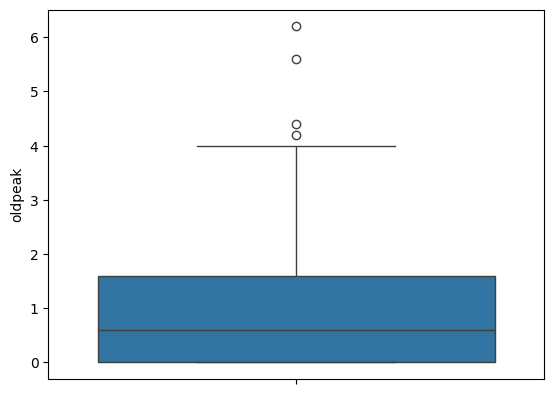

In [ ]:
sns.boxplot(data_akhir['oldpeak'])

In [ ]:
Q1= np.percentile(data_akhir['oldpeak'],25)
Q3= np.percentile(data_akhir['oldpeak'],75)
IQR=Q3-Q1
IQR

1.6

In [ ]:
lower_limit = data_akhir['oldpeak']<=(Q1-1.5*IQR)
upper_limit = data_akhir['oldpeak']>=(Q3+1.5*IQR)

In [ ]:
# Outlier
data_akhir[lower_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
# Outlier
data_akhir[upper_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
13,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
54,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
69,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
77,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0


In [ ]:
data_akhir=data_akhir[~lower_limit&~upper_limit]
data_akhir

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<Axes: ylabel='oldpeak'>

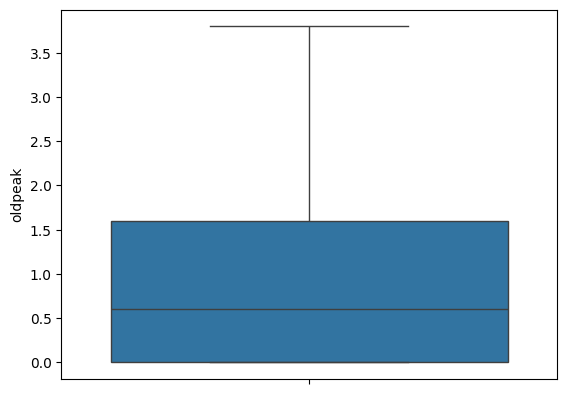

In [ ]:
sns.boxplot(data_akhir['oldpeak'])

### Memeriksa Outlier Data AKhir

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

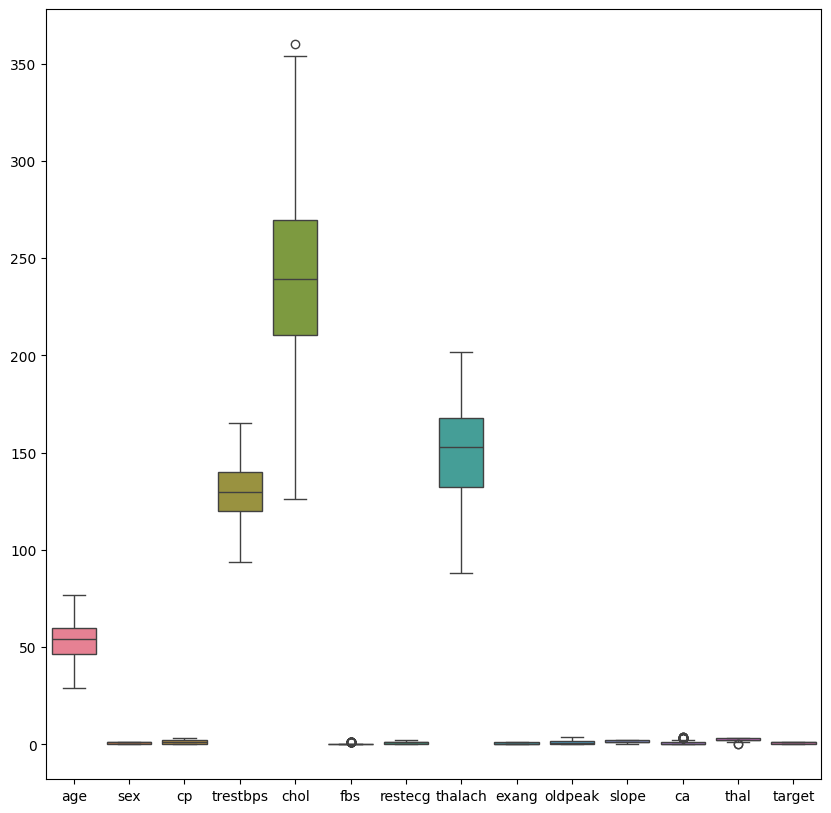

In [ ]:
plt.subplots(figsize=(10,10))
sns.boxplot(data_akhir)
plt.tight_layout

In [ ]:
#Menghilangkan Outlier pada Variabel chol
Q1= np.percentile(data_akhir['chol'],25)
Q3= np.percentile(data_akhir['chol'],75)
IQR=Q3-Q1
IQR

59.5

In [ ]:
lower_limit = data_akhir['chol']<=(Q1-1.5*IQR)
upper_limit = data_akhir['chol']>=(Q3+1.5*IQR)

In [ ]:
# Outlier
data_akhir[lower_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
# Outlier
data_akhir[upper_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
40,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1


In [ ]:
data_akhir=data_akhir[~lower_limit&~upper_limit]
data_akhir

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

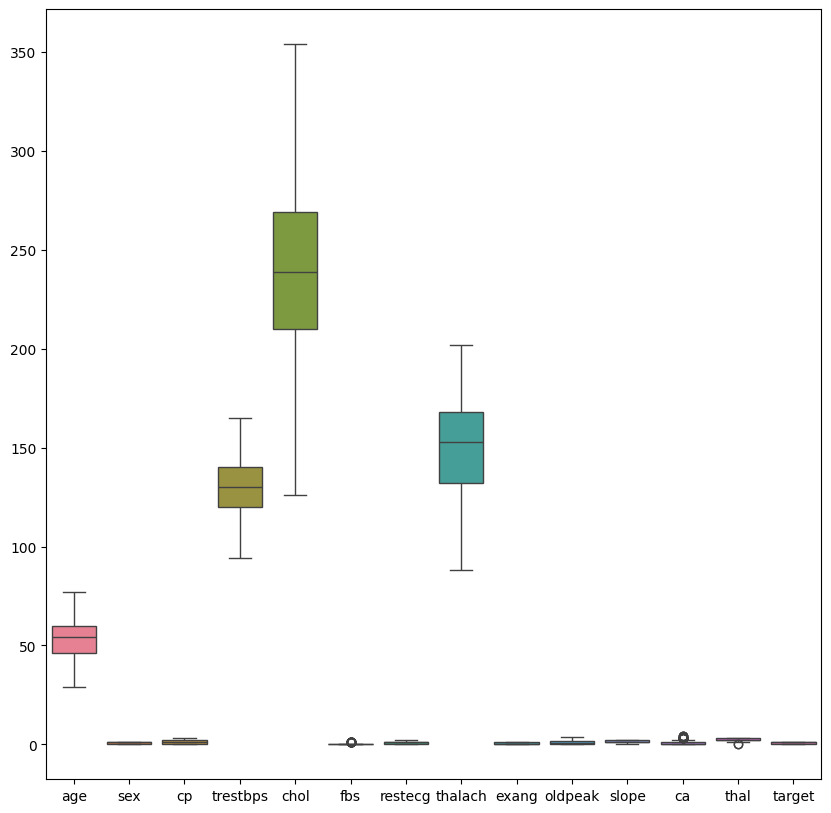

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data_akhir)
plt.tight_layout

## Handling Imbalancing Data

In [ ]:
data_akhir['sex'].value_counts()

sex
1    194
0     83
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

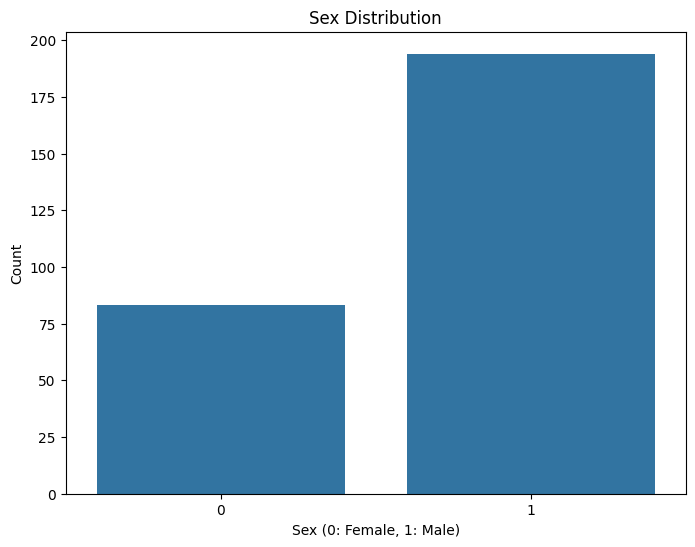

In [ ]:
class_counts= data_akhir['sex'].value_counts() #1 = male, 0 = female
plt.figure(figsize=(8, 6))
plt.title("Sex Distribution")
plt.xlabel("Sex (0: Female, 1: Male)")
plt.ylabel("Count")
sns.countplot(x = data_akhir['sex'])
plt.show

In [ ]:
oversample = SMOTE(random_state=42)  # Set random_state for reproducibility
X_resampled, y_resampled = oversample.fit_resample(data_akhir[['sex']], data_akhir['sex'])

In [ ]:
class_counts = y_resampled.value_counts()
print("Class Distribution (After Oversampling):", class_counts)

Class Distribution (After Oversampling): sex
1    194
0    194
Name: count, dtype: int64


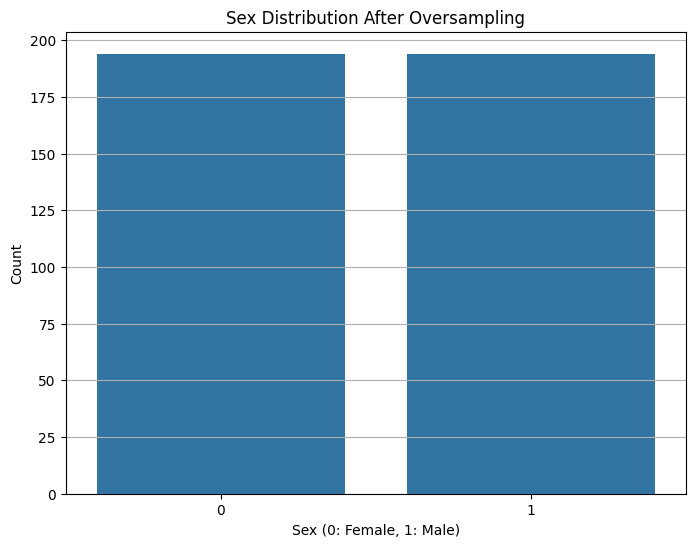

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=X_resampled['sex'])
plt.title("Sex Distribution After Oversampling")
plt.xlabel("Sex (0: Female, 1: Male)")
plt.ylabel("Count")
plt.grid(axis='y')  # Add grid lines for better readability
plt.show()

#Exploratory Data Analysis

In [ ]:
data_akhir.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       277 non-null    int64  
 1   sex       277 non-null    int64  
 2   cp        277 non-null    int64  
 3   trestbps  277 non-null    int64  
 4   chol      277 non-null    int64  
 5   fbs       277 non-null    int64  
 6   restecg   277 non-null    int64  
 7   thalach   277 non-null    int64  
 8   exang     277 non-null    int64  
 9   oldpeak   277 non-null    float64
 10  slope     277 non-null    int64  
 11  ca        277 non-null    int64  
 12  thal      277 non-null    int64  
 13  target    277 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.5 KB


In [ ]:
data_akhir.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,53.891697,0.700361,0.978339,129.158845,241.740072,0.140794,0.534296,149.978339,0.314079,0.929964,1.433213,0.696751,2.292419,0.563177
std,9.153828,0.458929,1.021277,14.643222,44.055354,0.348439,0.514021,22.916505,0.464988,1.002788,0.595923,0.986369,0.605871,0.496890
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,165.000000,354.000000,1.000000,2.000000,202.000000,1.000000,3.800000,2.000000,4.000000,3.000000,1.000000


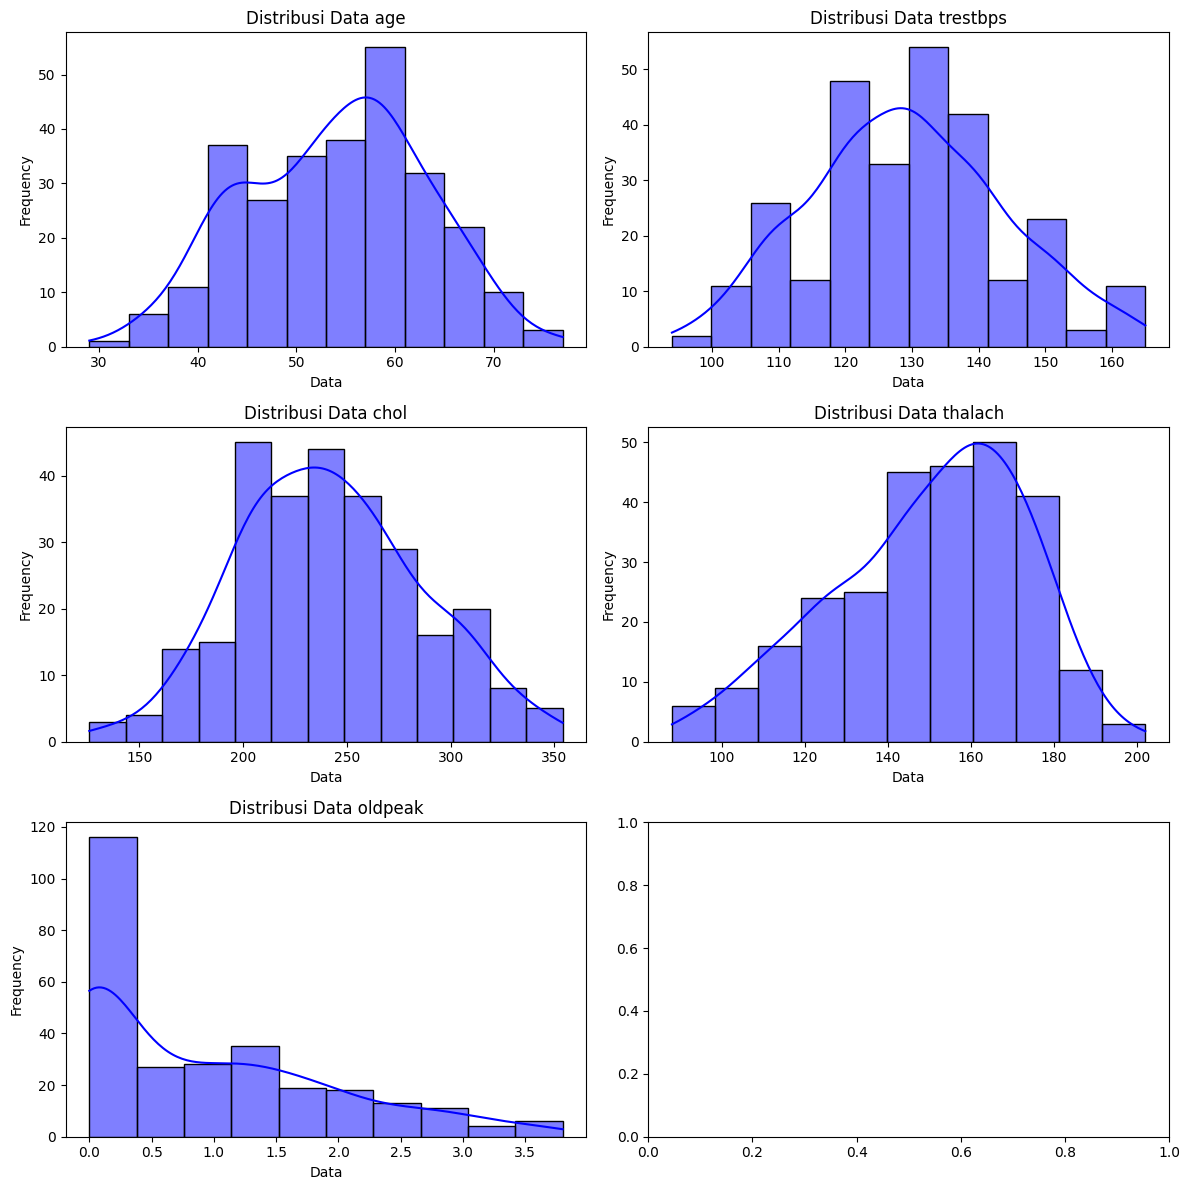

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

X = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
num_features = len(X)
num_rows = 3
num_cols = (num_features + num_rows - 1) // num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

for i, feature in enumerate(X):
    if feature in data_akhir.columns:
        data_distribusi = data_akhir[feature]
        skewness = stats.skew(data_distribusi)

        row_index = i // num_cols
        col_index = i % num_cols

        ax = axes[row_index, col_index]
        sns.histplot(data_distribusi, kde=True, color='blue', ax=ax)
        ax.set_xlabel('Data')
        ax.set_ylabel('Frequency')
        ax.set_title(f'Distribusi Data {feature}')

plt.tight_layout()
plt.show()

In [ ]:
data_akhir.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.063813,-0.069626,0.264621,0.165486,0.111578,-0.094691,-0.414536,0.092292,0.202920,-0.150111,0.328209,0.049502,-0.223921
sex,-0.063813,1.000000,-0.098932,0.013578,-0.118915,0.083515,-0.086831,-0.044027,0.187930,0.163655,-0.053566,0.158722,0.225049,-0.321844
cp,-0.069626,-0.098932,1.000000,0.064919,-0.097806,0.100237,0.091144,0.284211,-0.374735,-0.095593,0.098820,-0.157607,-0.200526,0.416815
trestbps,0.264621,0.013578,0.064919,1.000000,0.086096,0.128392,-0.097962,-0.075839,-0.012675,0.119567,-0.053587,0.123003,-0.024857,-0.102968
chol,0.165486,-0.118915,-0.097806,0.086096,1.000000,0.022927,-0.133842,-0.020713,0.086420,-0.006901,0.053435,0.105237,0.091633,-0.111630
fbs,0.111578,0.083515,0.100237,0.128392,0.022927,1.000000,-0.077631,-0.022304,-0.005570,0.005510,-0.067970,0.145762,-0.041265,-0.020171
restecg,-0.094691,-0.086831,0.091144,-0.097962,-0.133842,-0.077631,1.000000,0.089877,-0.098287,-0.070535,0.105087,-0.093751,0.043302,0.165260
thalach,-0.414536,-0.044027,0.284211,-0.075839,-0.020713,-0.022304,0.089877,1.000000,-0.387319,-0.344058,0.381143,-0.254029,-0.115927,0.425218
exang,0.092292,0.187930,-0.374735,-0.012675,0.086420,-0.005570,-0.098287,-0.387319,1.000000,0.292111,-0.257451,0.121518,0.212970,-0.423345
oldpeak,0.202920,0.163655,-0.095593,0.119567,-0.006901,0.005510,-0.070535,-0.344058,0.292111,1.000000,-0.538979,0.166731,0.195441,-0.425921


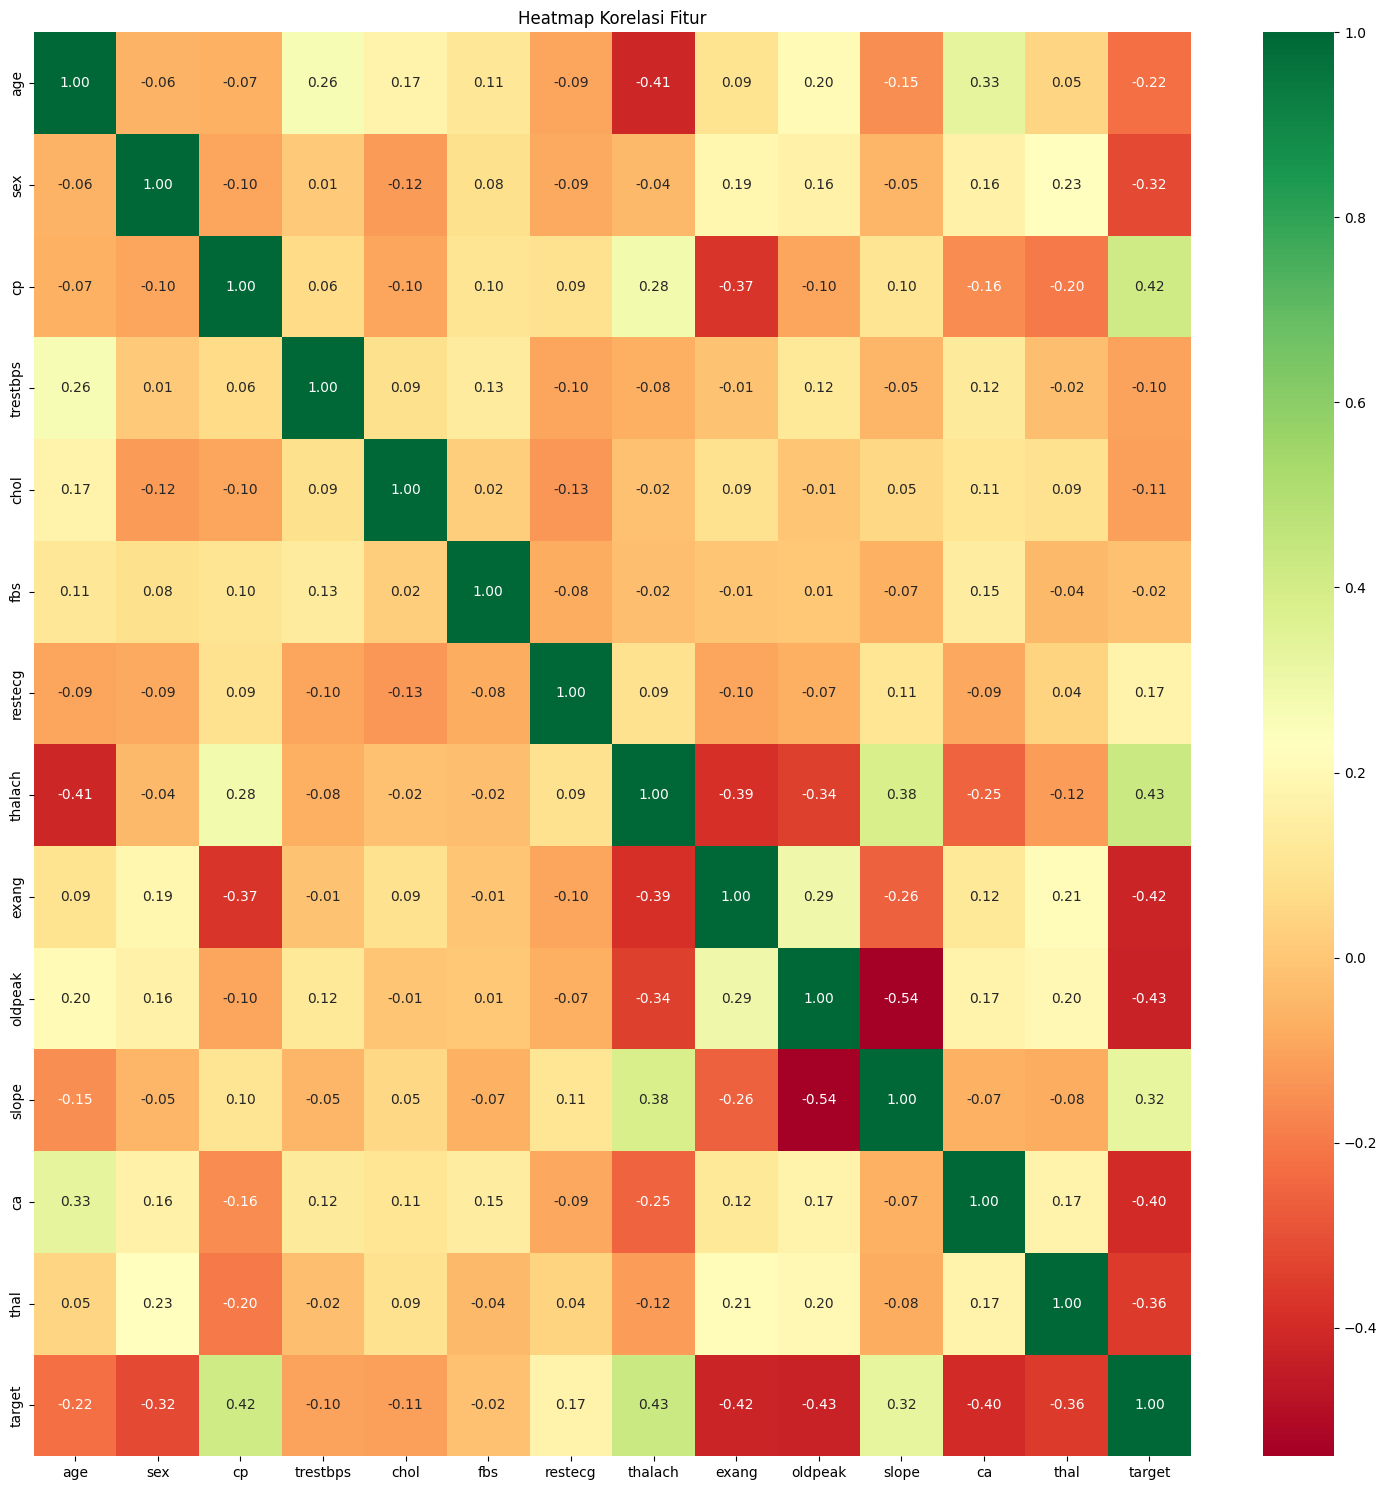

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = data_akhir.corr()
top_corr_features = corr_matrix.index

plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(data_akhir[top_corr_features].corr(), annot=True, fmt= '.2f', cmap='RdYlGn')
plt.title('Heatmap Korelasi Fitur')
plt.tight_layout()
plt.show()


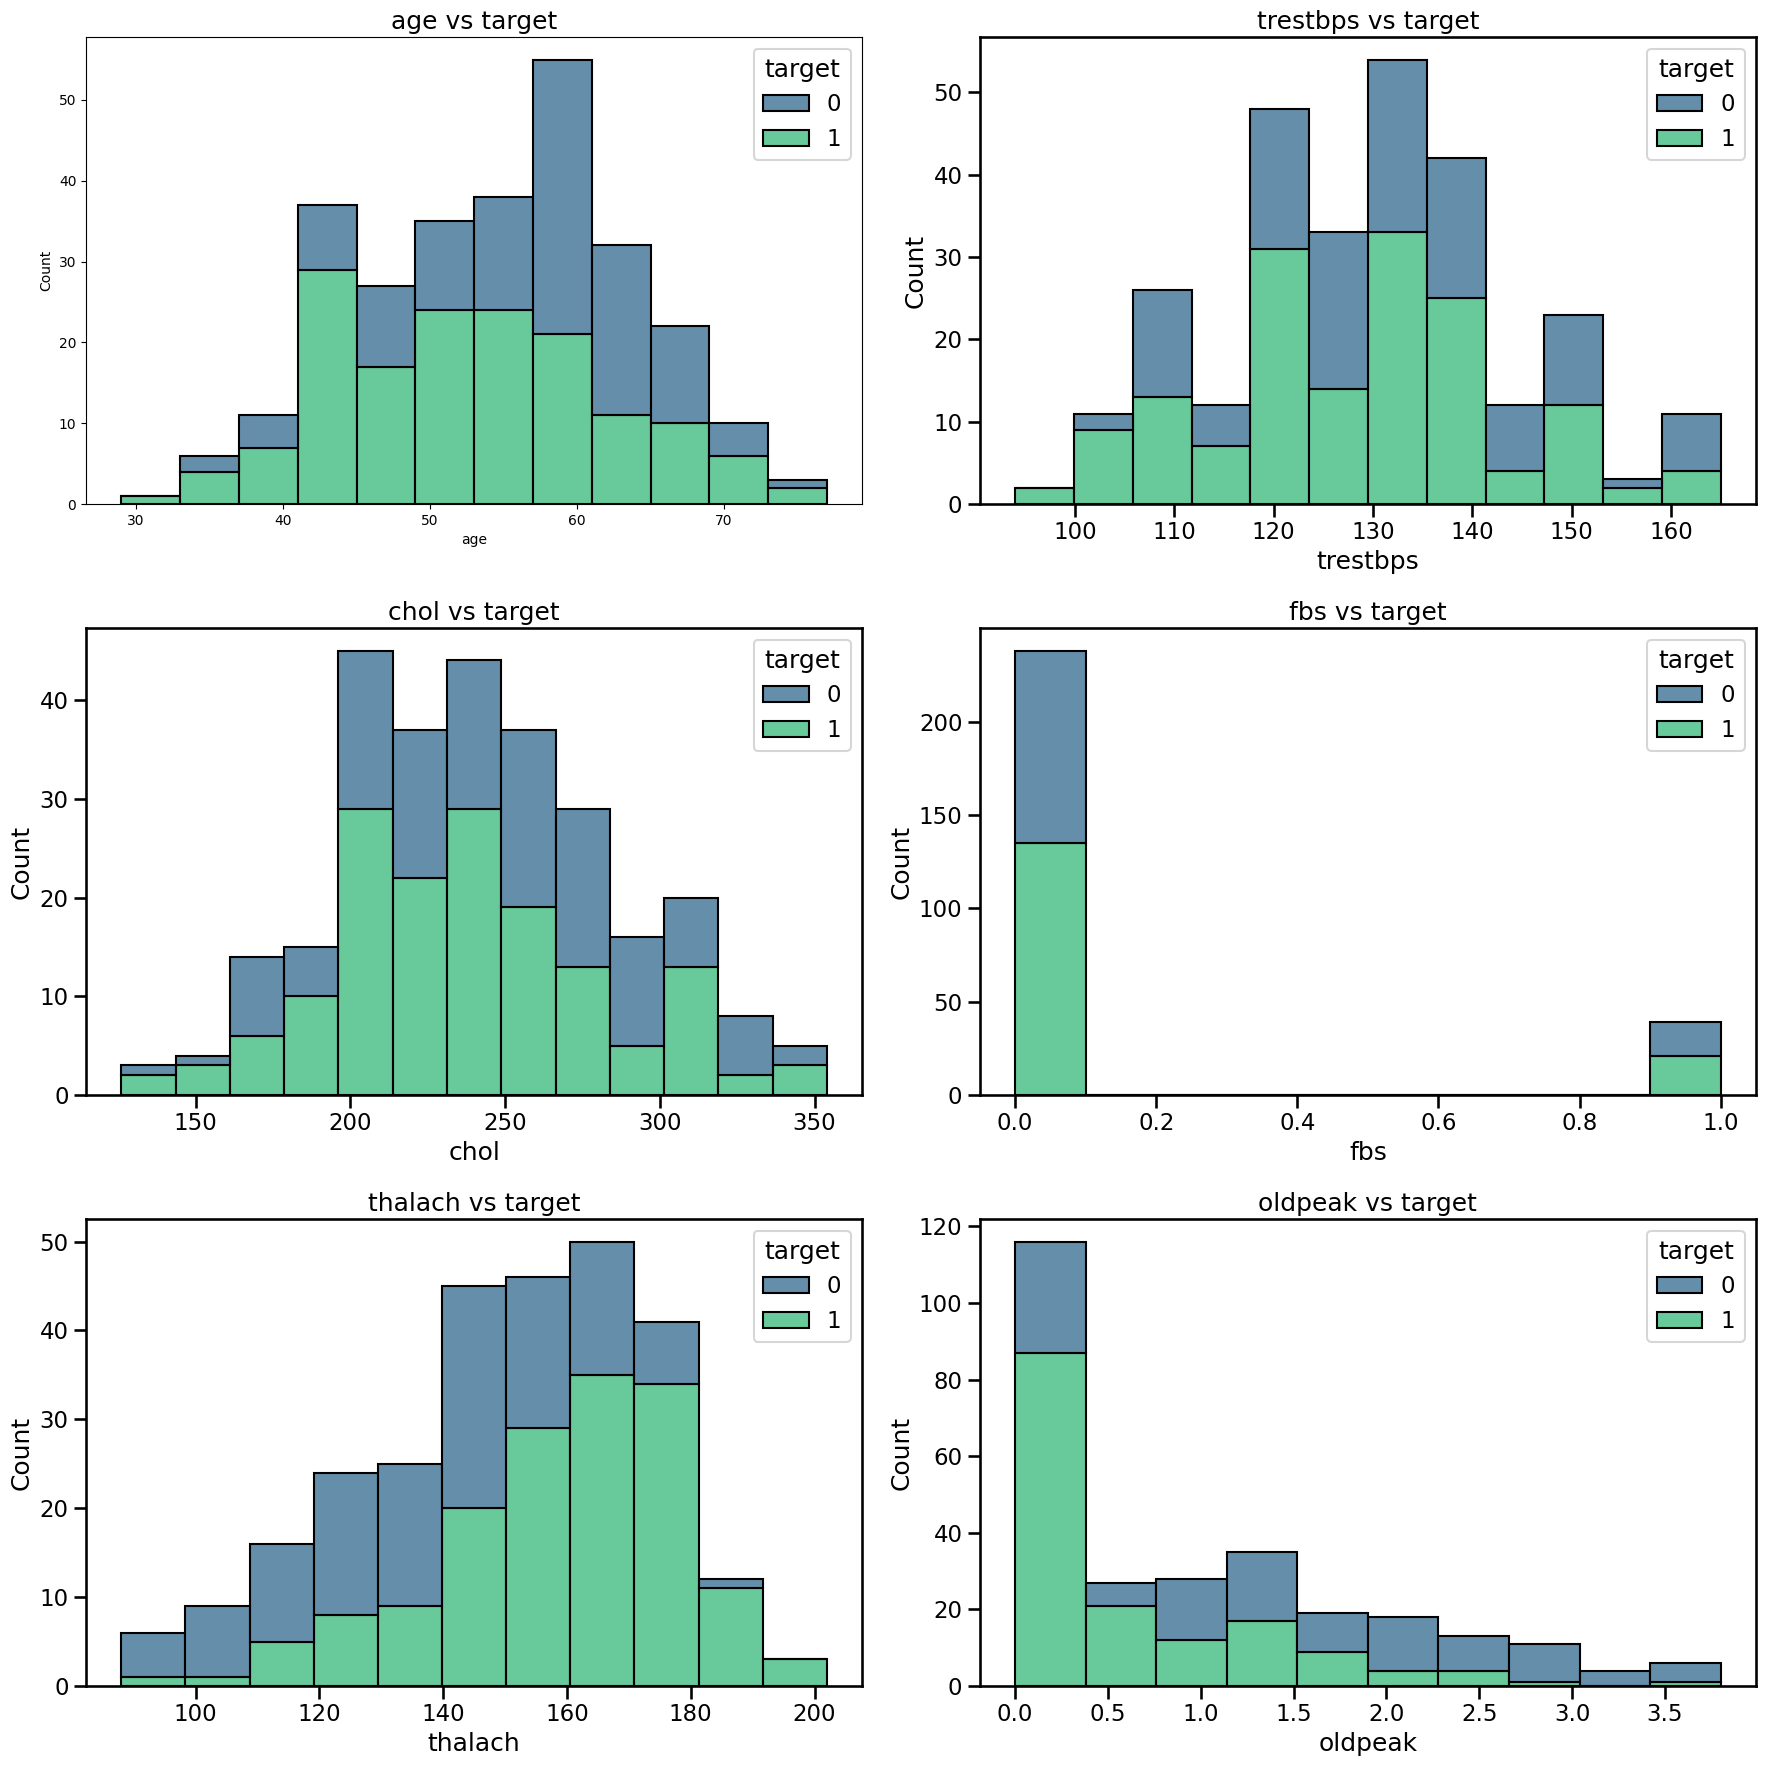

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,18))

# Plot 1
plt.subplot(3,2,1)
sns.set_context('talk')
sns.histplot(data=data_akhir, x='age', hue="target", multiple="stack", palette='viridis')
plt.title('age vs target')

# Plot 2
plt.subplot(3,2,2)
sns.histplot(data=data_akhir, x='trestbps', hue="target", multiple="stack", palette='viridis')
plt.title('trestbps vs target')

# Plot 3
plt.subplot(3,2,3)
sns.histplot(data=data_akhir, x='chol', hue="target", multiple="stack", palette='viridis')
plt.title('chol vs target')

# Plot 4
plt.subplot(3,2,4)
sns.histplot(data=data_akhir, x='fbs', hue="target", multiple="stack", palette='viridis')
plt.title('fbs vs target')

# Plot 5
plt.subplot(3,2,5)
sns.histplot(data=data_akhir, x='thalach', hue="target", multiple="stack", palette='viridis')
plt.title('thalach vs target')

# Plot 6
plt.subplot(3,2,6)
sns.histplot(data=data_akhir, x='oldpeak', hue="target", multiple="stack", palette='viridis')
plt.title('oldpeak vs target')

plt.tight_layout()
plt.show()

#Machine Learning

Pada kesempatan kali ini saya menggunakan model Machine Learning **SVM (Support Vector Machine)**, **Random Forest**, **KNN(K-Nearest Neighbors)**, **Gaussian Naive Bayes**, dan **Logistic Regression** untuk melakukan klasifikasi penyakit jantung.

Pemilihan **SVM** dan **Random Forest** untuk **klasifikasi** penyakit jantung didasarkan pada kemampuan keduanya dalam menangani data kompleks dan tidak seimbang, serta mampu menangani interaksi nonlinear antara variabel input dan output. **SVM** dan **Random Forest** memiliki ketahanan terhadap overfitting dan kemampuan generalisasi yang baik, menjadikannya pilihan yang kuat untuk mengembangkan model klasifikasi yang akurat dan dapat diandalkan dalam diagnosis penyakit jantung. Penggunaan **KNN**, **Logistic Regression**, dan **Naive Bayes** juga dipertimbangkan untuk memperluas cakupan pembandingan. **KNN** dipilih karena sifatnya yang sederhana namun efektif untuk data dengan struktur kompleks, sementara **Logistic Regression** dan **Naive Bayes** dipertimbangkan karena kemampuan interpretasi yang tinggi dan mampu mengatasi data kategori. Dengan membandingkan kelima model ini, diharapkan dapat dikembangkan model klasifikasi yang akurat dan dapat diandalkan dalam diagnosis penyakit jantung.

## Pembagian Data Testing dan Training

---

Pada kesempatan ini saya menggunakan pembagian **75:25** dimana **75%** data training dan **25%** data testing

In [ ]:
X = data_akhir.drop(columns=['target'])
Y = data_akhir['target']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=42)

##Random Forest

---



### Eksekusi Kode

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=42)

### Cross Validation

In [ ]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross Validation Scores: [0.83333333 0.78571429 0.87804878 0.87804878 0.80487805]
Mean CV Score: 0.8360046457607433


***Hasil cross-validation pada model Random Forest menunjukkan adanya variasi kinerja antara lipatan, dengan rentang skor akurasi dari 0,79 hingga 0,88 untuk CV=5. Meskipun demikian, rata-rata akurasi sekitar 0,84 menandakan bahwa secara keseluruhan, model dapat memberikan prediksi yang baik. Variasi ini mengindikasikan kompleksitas dalam dataset atau sensitivitas terhadap pembagian data latih-uji. Meskipun begitu, keandalan model tetap tinggi, menunjukkan bahwa Random Forest secara konsisten dapat memberikan prediksi yang dapat diandalkan dalam berbagai kasus penggunaan.***

### Learning Curve

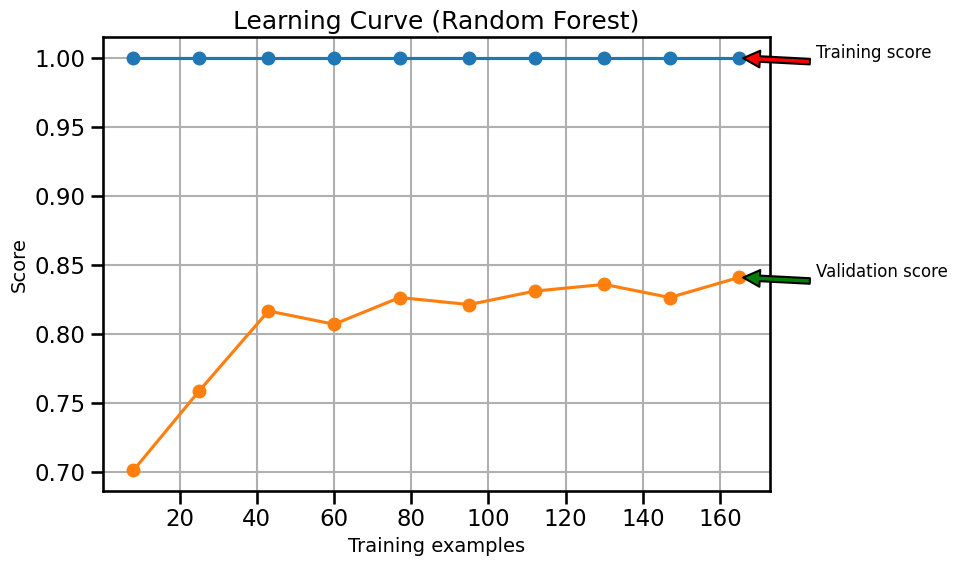

In [ ]:
def plot_learning_curve_comparison(estimator, title, X_train, y_train, X_test, y_test, ylim=None, cv=None,
                                   n_jobs=None, train_sizes=np.linspace(.05, 1.0, 10)):

    plt.figure(figsize=(10, 6))
    plt.title(title, fontsize=18)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples", fontsize=14)
    plt.ylabel("Score", fontsize=14)

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-')
    plt.plot(train_sizes, test_scores_mean, 'o-')

    # Menambahkan label di luar grafik
    plt.annotate('Training score', xy=(train_sizes[-1], train_scores_mean[-1]), xytext=(train_sizes[-1] + 20, train_scores_mean[-1]), fontsize=12,
                 arrowprops=dict(facecolor='red', shrink=0.05))
    plt.annotate('Validation score', xy=(train_sizes[-1], test_scores_mean[-1]), xytext=(train_sizes[-1] + 20, test_scores_mean[-1]), fontsize=12,
                 arrowprops=dict(facecolor='green', shrink=0.05))

    plt.tight_layout()
    return plt

# Example usage:
plot_learning_curve_comparison(model, "Learning Curve (Random Forest)", X_train, y_train, X_test, y_test, cv=5)
plt.show()


***Learning Curve*** menunjukkan tanda-tanda ***overfitting*** yang cukup jelas. Skor *training* yang signifikan lebih tinggi daripada skor validasi, dengan skor *training* mendekati **1.0** sementara skor validasi hanya sekitar **0.85**, menandakan bahwa model telah mempelajari data *training* dengan sangat baik tetapi gagal menggeneralisasi dengan baik pada data validasi. Selain itu, perbedaan besar antara skor *training* dan validasi, sekitar **0.15**, mengindikasikan bahwa model terlalu fokus pada data *training* dan gagal belajar pola yang lebih umum. Fluktuasi besar dalam kurva *training*, terutama pada bagian akhir, juga menunjukkan bahwa model mungkin telah mempelajari beberapa kebisingan dalam data *training*, yang dapat mengganggu kinerja model pada data baru.

### Confusion Matrix

In [ ]:
model.fit(X_train, y_train)
model_predicted = model.predict(X_test)

model_acc_score = accuracy_score(y_test, model_predicted)
model_conf_matrix = confusion_matrix(y_test, model_predicted)

print("Accuracy Score for Best Model: {:.4f}%".format(model_acc_score * 100))
print("Confusion Matrix:")
print(model_conf_matrix)

Accuracy Score for Best Model: 82.8571%
Confusion Matrix:
[[23  7]
 [ 5 35]]


Accuracy Score for Best Model: 82.8571%
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.83      0.88      0.85        40

    accuracy                           0.83        70
   macro avg       0.83      0.82      0.82        70
weighted avg       0.83      0.83      0.83        70



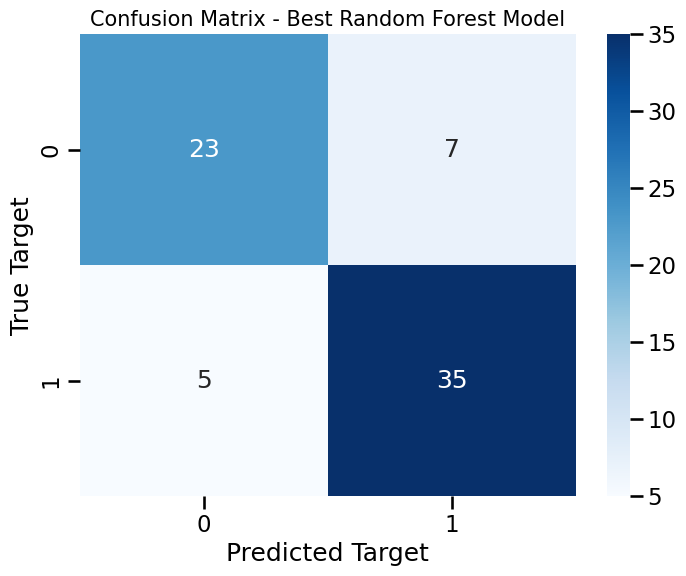

In [ ]:
print("Accuracy Score for Best Model: {:.4f}%".format(model_acc_score * 100))
print("Classification Report:")
print(classification_report(y_test, model_predicted))

#Visualisasi Confussion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(model_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Confusion Matrix - Best Random Forest Model", fontsize=15)
plt.xlabel("Predicted Target")
plt.ylabel("True Target")
plt.show()

**Interpretasi Confusion Matrix Random Forest**

1. **Accuracy Score:** Akurasi dari model **Random Forest** adalah sebesar 82.86%. Ini menunjukkan bahwa model berhasil memprediksi kelas dengan benar sekitar 82.86% dari keseluruhan data.

2. **Classification Report:**
  - **Precision:** Presisi untuk kelas 0 (label negatif) adalah 0.84, yang berarti dari semua data yang diprediksi sebagai kelas 0, 84% adalah benar-benar kelas 0. Presisi untuk kelas 1 (label positif) adalah 0.82, yang berarti dari semua data yang diprediksi sebagai kelas 1, 82% adalah benar-benar kelas 1.
  - **Recall:** Recall untuk kelas 0 adalah 0.79, yang berarti dari semua data yang sebenarnya kelas 0, model berhasil memprediksi 79% dengan benar. Recall untuk kelas 1 adalah 0.86, yang berarti dari semua data yang sebenarnya kelas 1, model berhasil memprediksi 86% dengan benar.
  - **F1-score:** Skor F1 untuk kelas 0 adalah 0.82, yang merupakan rata-rata harmonik dari precision dan recall untuk kelas 0. Skor F1 untuk kelas 1 adalah 0.84, yang merupakan rata-rata harmonik dari precision dan recall untuk kelas 1.
  - **Support:** Jumlah sampel dalam setiap kelas.

3. **Macro Avg dan Weighted Avg:** Rata-rata dari precision, recall, dan F1-score dihitung secara independen untuk setiap kelas (macro avg), dan kemudian dibobotkan berdasarkan jumlah sampel dalam setiap kelas (weighted avg). Rata-rata dari setiap metrik dihitung untuk memberikan gambaran keseluruhan kinerja model.

Dengan demikian, hasil tersebut menunjukkan bahwa model **Random Forest** memiliki kinerja yang baik dalam memprediksi kelas 0 dan kelas 1. Akurasi yang tinggi serta skor precision, recall, dan F1-score yang seimbang menunjukkan bahwa model ini mampu memberikan prediksi yang baik untuk kedua kelas.

##Support Vector Machine

---



### Eksekusi Kode

In [ ]:
# Inisialisasi dan latih model SVC
model_svc = SVC()

###Cross Validation

In [ ]:
cv_scores = cross_val_score(model_svc, X_train, y_train, cv=5)
print("Cross Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross Validation Scores: [0.88095238 0.85714286 0.92682927 0.82926829 0.75609756]
Mean CV Score: 0.8500580720092914


***Hasil cross-validation pada model SVM menunjukkan adanya variasi kinerja antara lipatan, dengan rentang skor akurasi dari 0,76 hingga 0,93 untuk CV=5. Meskipun demikian, rata-rata akurasi sekitar 0,85 menandakan bahwa secara keseluruhan, model dapat memberikan prediksi yang baik. Variasi ini mengindikasikan kompleksitas dalam dataset atau sensitivitas terhadap pembagian data latih-uji. Meskipun begitu, keandalan model tetap tinggi, menunjukkan bahwa SVM secara konsisten dapat memberikan prediksi yang dapat diandalkan dalam berbagai kasus penggunaan.***

###Learning Curve

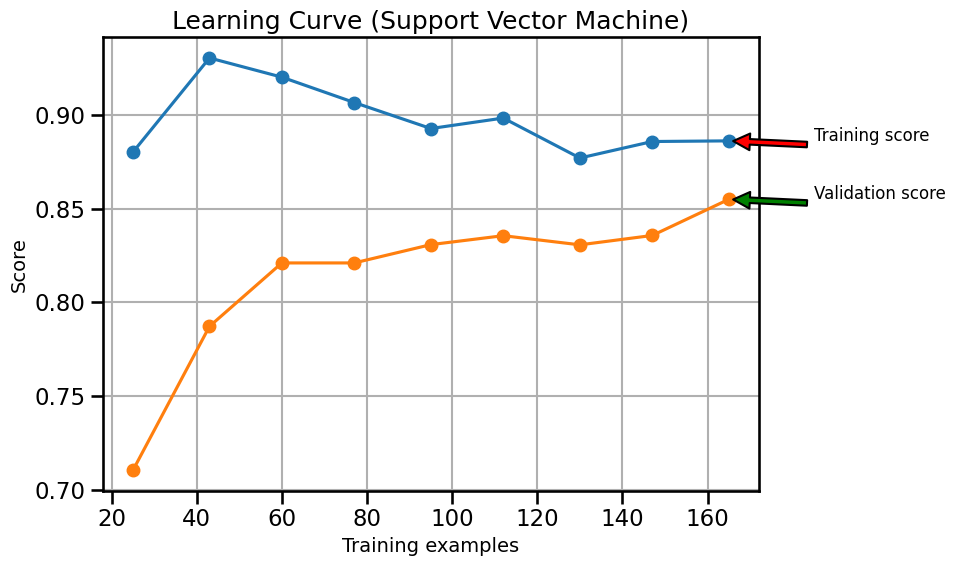

In [ ]:
def plot_learning_curve_comparison(estimator, title, X_train, y_train, X_test, y_test, ylim=None, cv=None,
                                   n_jobs=None, train_sizes=np.linspace(.05, 1.0, 10)):

    plt.figure(figsize=(10, 6))
    plt.title(title, fontsize=18)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples", fontsize=14)
    plt.ylabel("Score", fontsize=14)

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-')
    plt.plot(train_sizes, test_scores_mean, 'o-')

    # Menambahkan label di luar grafik
    plt.annotate('Training score', xy=(train_sizes[-1], train_scores_mean[-1]), xytext=(train_sizes[-1] + 20, train_scores_mean[-1]), fontsize=12,
                 arrowprops=dict(facecolor='red', shrink=0.05))
    plt.annotate('Validation score', xy=(train_sizes[-1], test_scores_mean[-1]), xytext=(train_sizes[-1] + 20, test_scores_mean[-1]), fontsize=12,
                 arrowprops=dict(facecolor='green', shrink=0.05))

    plt.tight_layout()
    return plt

# Example usage:
plot_learning_curve_comparison(model_svc, "Learning Curve (Support Vector Machine)", X_train, y_train, X_test, y_test, cv=5)
plt.show()


***Learning Curve*** pada gambar menunjukkan ***overfitting***. Hal ini terlihat dari skor *training* yang lebih tinggi daripada skor evaluasi. Skor *training* terus meningkat seiring dengan bertambahnya data *training*, menunjukkan bahwa model belajar terlalu banyak dari data *training* dan mulai menghafal detail yang tidak relevan. Hal ini menyebabkan **model berkinerja buruk** pada data baru yang tidak terlihat selama *training*.

###Confusion Matrix

In [ ]:
model_svc.fit(X_train, y_train)
model_svc_predicted = model_svc.predict(X_test)

model_svc_acc_score = accuracy_score(y_test, model_svc_predicted)
model_svc_conf_matrix = confusion_matrix(y_test, model_svc_predicted)

print("Accuracy Score for Best Model: {:.4f}%".format(model_svc_acc_score * 100))
print("Confusion Matrix:")
print(model_svc_conf_matrix)

Accuracy Score for Best Model: 81.4286%
Confusion Matrix:
[[22  8]
 [ 5 35]]


Accuracy Score for Best Model: 81.4286%
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77        30
           1       0.81      0.88      0.84        40

    accuracy                           0.81        70
   macro avg       0.81      0.80      0.81        70
weighted avg       0.81      0.81      0.81        70



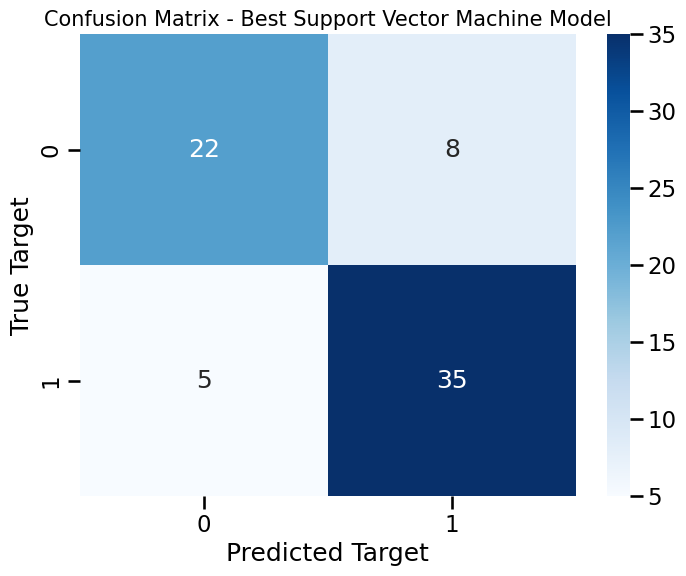

In [ ]:
print("Accuracy Score for Best Model: {:.4f}%".format(model_svc_acc_score * 100))
print("Classification Report:")
print(classification_report(y_test,model_svc_predicted))

#Visualisasi Confussion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(model_svc_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Confusion Matrix - Best Support Vector Machine Model", fontsize=15)
plt.xlabel("Predicted Target")
plt.ylabel("True Target")
plt.show()

**Interpretasi Confusion Matrix SVM**:

1. **Accuracy Score**: Akurasi dari model SVM adalah sebesar 81.43%. Ini menunjukkan bahwa model berhasil memprediksi kelas dengan benar sekitar 81.43% dari keseluruhan data.
   
2. **Classification Report**:
    - **Precision**: Presisi untuk kelas 0 (label negatif) adalah 0.86, yang berarti dari semua data yang diprediksi sebagai kelas 0, 86% adalah benar-benar kelas 0. Presisi untuk kelas 1 (label positif) adalah 0.78, yang berarti dari semua data yang diprediksi sebagai kelas 1, 78% adalah benar-benar kelas 1.
    - **Recall**: Recall untuk kelas 0 adalah 0.74, yang berarti dari semua data yang sebenarnya kelas 0, model berhasil memprediksi 74% dengan benar. Recall untuk kelas 1 adalah 0.89, yang berarti dari semua data yang sebenarnya kelas 1, model berhasil memprediksi 89% dengan benar.
    - **F1-score**: Skor F1 untuk kelas 0 adalah 0.79, yang merupakan rata-rata harmonik dari precision dan recall untuk kelas 0. Skor F1 untuk kelas 1 adalah 0.83, yang merupakan rata-rata harmonik dari precision dan recall untuk kelas 1.
    - **Support**: Jumlah sampel dalam setiap kelas.

3. **Macro Avg dan Weighted Avg**: Rata-rata dari precision, recall, dan F1-score dihitung secara independen untuk setiap kelas (macro avg), dan kemudian dibobotkan berdasarkan jumlah sampel dalam setiap kelas (weighted avg). Rata-rata dari setiap metrik dihitung untuk memberikan gambaran keseluruhan kinerja model.

Dengan demikian, hasil tersebut menunjukkan bahwa model SVM memiliki kinerja yang cukup baik dalam memprediksi kelas 0 dan kelas 1. Meskipun ada sedikit perbedaan dalam presisi dan recall antara kelas 0 dan kelas 1, namun skor F1 yang baik menunjukkan bahwa model memiliki keseimbangan yang baik antara precision dan recall untuk kedua kelas.

## Logistic Regression

---



### Eksekusi Kode

In [ ]:
model_lr = LogisticRegression()

### Cross Validation

In [ ]:
cv_scores = cross_val_score(model_lr, X_train, y_train, cv=5)
print("Cross Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross Validation Scores: [0.9047619  0.78571429 0.90243902 0.85365854 0.75609756]
Mean CV Score: 0.8405342624854819


***Hasil cross-validation pada model Logistic Regression menunjukkan adanya variasi kinerja antara lipatan, dengan rentang skor akurasi dari 0,76 hingga 0,90 untuk CV=5. Meskipun demikian, rata-rata akurasi sekitar 0,84 menandakan bahwa secara keseluruhan, model dapat memberikan prediksi yang baik. Variasi ini mengindikasikan kompleksitas dalam dataset atau sensitivitas terhadap pembagian data latih-uji. Meskipun begitu, keandalan model tetap tinggi, menunjukkan bahwa Logistic Regression secara konsisten dapat memberikan prediksi yang dapat diandalkan dalam berbagai kasus penggunaan.***

###Learning Curve

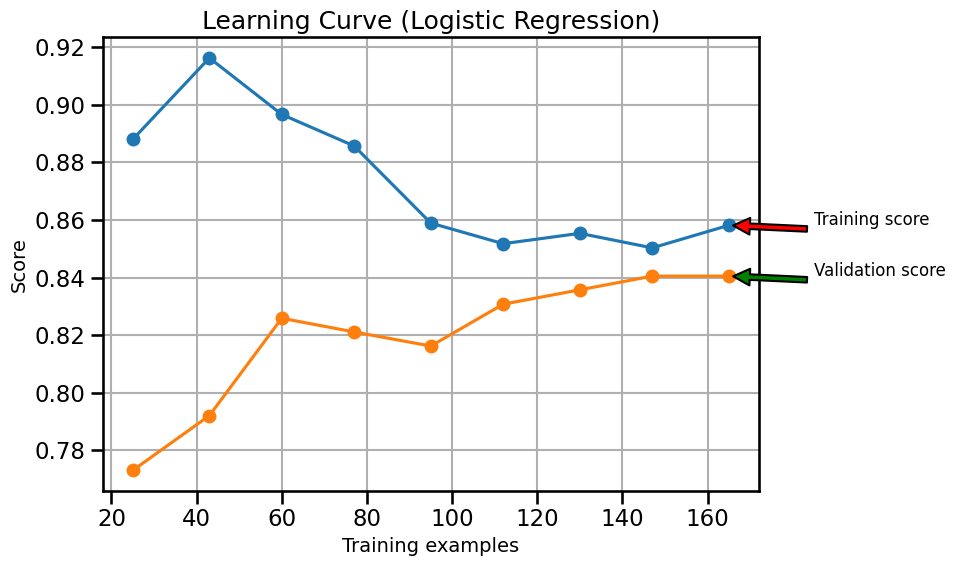

In [ ]:
def plot_learning_curve_comparison(estimator, title, X_train, y_train, X_test, y_test, ylim=None, cv=None,
                                   n_jobs=None, train_sizes=np.linspace(.05, 1.0, 10)):

    plt.figure(figsize=(10, 6))
    plt.title(title, fontsize=18)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples", fontsize=14)
    plt.ylabel("Score", fontsize=14)

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-')
    plt.plot(train_sizes, test_scores_mean, 'o-')

    # Menambahkan label di luar grafik
    plt.annotate('Training score', xy=(train_sizes[-1], train_scores_mean[-1]), xytext=(train_sizes[-1] + 20, train_scores_mean[-1]), fontsize=12,
                 arrowprops=dict(facecolor='red', shrink=0.05))
    plt.annotate('Validation score', xy=(train_sizes[-1], test_scores_mean[-1]), xytext=(train_sizes[-1] + 20, test_scores_mean[-1]), fontsize=12,
                 arrowprops=dict(facecolor='green', shrink=0.05))

    plt.tight_layout()
    return plt

# Example usage:
plot_learning_curve_comparison(model_lr, "Learning Curve (Logistic Regression)", X_train, y_train, X_test, y_test, cv=5)
plt.show()



***Learning Curve*** menunjukkan tanda-tanda ***overfitting***. Hal ini terlihat dari skor *training* yang jauh lebih tinggi **(92%)** dibandingkan skor validasi **(82%)**. Perbedaan skor yang besar **(10%)** ini menunjukkan bahwa model telah mempelajari detail yang tidak relevan dari data* training*, sehingga tidak dapat menggeneralisasi dengan baik pada data baru.

Kesimpulannya, model **tidak berkinerja baik** pada data *training* dan data baru karena underfitting.

###Confusion Matrix

In [ ]:
model_lr.fit(X_train, y_train)
model_lr_predicted = model_lr.predict(X_test)

model_lr_acc_score = accuracy_score(y_test, model_lr_predicted)
model_lr_conf_matrix = confusion_matrix(y_test, model_lr_predicted)

print("Accuracy Score for Best Model: {:.4f}%".format(model_lr_acc_score * 100))
print("Confusion Matrix:")
print(model_lr_conf_matrix)

Accuracy Score for Best Model: 80.0000%
Confusion Matrix:
[[22  8]
 [ 6 34]]


Accuracy Score for Best Model: 80.0000%
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.81      0.85      0.83        40

    accuracy                           0.80        70
   macro avg       0.80      0.79      0.79        70
weighted avg       0.80      0.80      0.80        70



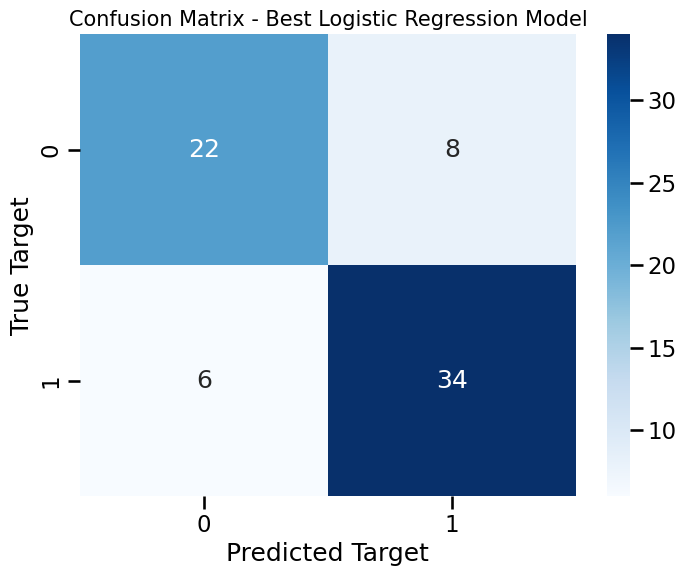

In [ ]:
print("Accuracy Score for Best Model: {:.4f}%".format(model_lr_acc_score * 100))
print("Classification Report:")
print(classification_report(y_test,model_lr_predicted))

#Visualisasi Confussion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(model_lr_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Confusion Matrix - Best Logistic Regression Model", fontsize=15)
plt.xlabel("Predicted Target")
plt.ylabel("True Target")
plt.show()

**Interpretasi Confusion Matrix Logistic Regression**:

1. **Accuracy Score:** Akurasi dari model Logistic Regression adalah sebesar 80.00%. Ini menunjukkan bahwa model berhasil memprediksi kelas dengan benar sekitar 80.00% dari keseluruhan data.

2. **Classification Report:**
  - **Precision:** Presisi untuk kelas 0 (label negatif) adalah 0.92, yang berarti dari semua data yang diprediksi sebagai kelas 0, 92% adalah benar-benar kelas 0. Presisi untuk kelas 1 (label positif) adalah 0.74, yang berarti dari semua data yang diprediksi sebagai kelas 1, 74% adalah benar-benar kelas 1.
  - **Recall:** Recall untuk kelas 0 adalah 0.65, yang berarti dari semua data yang sebenarnya kelas 0, model berhasil memprediksi 65% dengan benar. Recall untuk kelas 1 adalah 0.94, yang berarti dari semua data yang sebenarnya kelas 1, model berhasil memprediksi 94% dengan benar.
  - **F1-score:** Skor F1 untuk kelas 0 adalah 0.76, yang merupakan rata-rata harmonik dari precision dan recall untuk kelas 0. Skor F1 untuk kelas 1 adalah 0.83, yang merupakan rata-rata harmonik dari precision dan recall untuk kelas 1.
  - **Support:** Jumlah sampel dalam setiap kelas.

3. **Macro Avg dan Weighted Avg:** Rata-rata dari precision, recall, dan F1-score dihitung secara independen untuk setiap kelas (macro avg), dan kemudian dibobotkan berdasarkan jumlah sampel dalam setiap kelas (weighted avg). Rata-rata dari setiap metrik dihitung untuk memberikan gambaran keseluruhan kinerja model.

Dengan demikian, hasil tersebut menunjukkan bahwa model Logistic Regression memiliki kinerja yang cukup baik dalam memprediksi kelas 0 dan kelas 1. Meskipun ada perbedaan yang signifikan dalam recall antara kelas 0 dan kelas 1, namun skor F1 yang baik menunjukkan bahwa model memiliki keseimbangan yang cukup baik antara precision dan recall untuk kedua kelas.

##K-Nearest Neighbors(KNN)

---



###Eksekusi Kode

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors=3)

###Cross Validaton

In [ ]:
cv_scores = cross_val_score(model_KNN, X_train, y_train, cv=5)
print("Cross Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross Validation Scores: [0.88095238 0.83333333 0.82926829 0.82926829 0.7804878 ]
Mean CV Score: 0.8306620209059232


***Hasil cross-validation pada model KNN menunjukkan adanya variasi kinerja antara lipatan, dengan rentang skor akurasi dari 0,78 hingga 0,88 untuk CV=5. Meskipun demikian, rata-rata akurasi sekitar 0,83 menandakan bahwa secara keseluruhan, model dapat memberikan prediksi yang baik. Variasi ini mengindikasikan kompleksitas dalam dataset atau sensitivitas terhadap pembagian data latih-uji. Meskipun begitu, keandalan model tetap tinggi, menunjukkan bahwa KNN secara konsisten dapat memberikan prediksi yang dapat diandalkan dalam berbagai kasus penggunaan.***

###Learning Curve

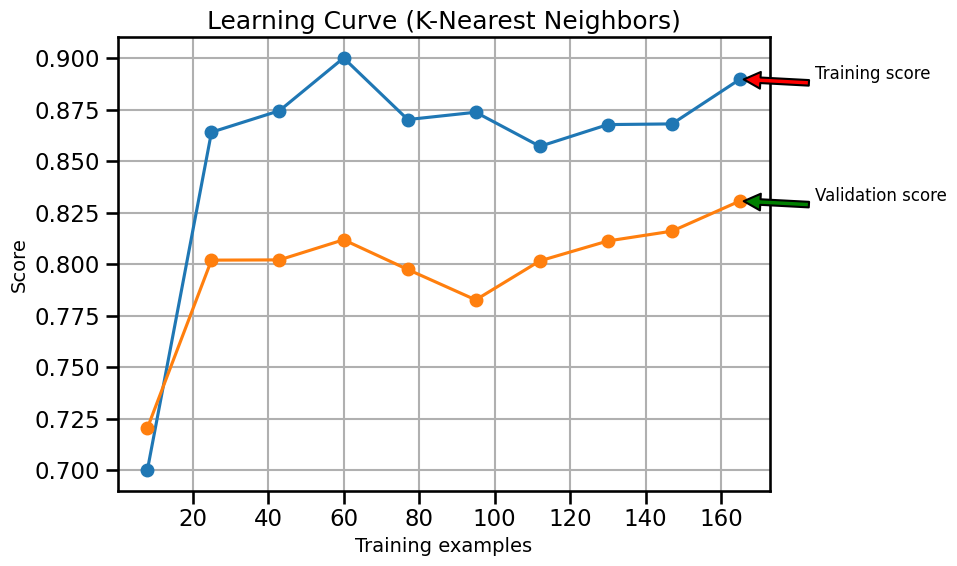

In [ ]:
def plot_learning_curve_comparison(estimator, title, X_train, y_train, X_test, y_test, ylim=None, cv=None,
                                   n_jobs=None, train_sizes=np.linspace(.05, 1.0, 10)):

    plt.figure(figsize=(10, 6))
    plt.title(title, fontsize=18)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples", fontsize=14)
    plt.ylabel("Score", fontsize=14)

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-')
    plt.plot(train_sizes, test_scores_mean, 'o-')

    # Menambahkan label di luar grafik
    plt.annotate('Training score', xy=(train_sizes[-1], train_scores_mean[-1]), xytext=(train_sizes[-1] + 20, train_scores_mean[-1]), fontsize=12,
                 arrowprops=dict(facecolor='red', shrink=0.05))
    plt.annotate('Validation score', xy=(train_sizes[-1], test_scores_mean[-1]), xytext=(train_sizes[-1] + 20, test_scores_mean[-1]), fontsize=12,
                 arrowprops=dict(facecolor='green', shrink=0.05))

    plt.tight_layout()
    return plt

# Example usage:
plot_learning_curve_comparison(model_KNN, "Learning Curve (K-Nearest Neighbors)", X_train, y_train, X_test, y_test, cv=5)
plt.show()



***Learning Curve*** menunjukkan tanda-tanda ***overfitting***. Hal ini terlihat dari skor *training* yang lebih tinggi daripada skor validasi, menunjukkan bahwa model terlalu fokus pada data *training* dan tidak dapat digeneralisasikan dengan baik pada data baru. Skor *training* yang mencapai plateau (datar) di episode awal menunjukkan bahwa model mulai menghafal data *training* dan tidak lagi belajar secara efektif. Meskipun skor validasi masih meningkat, model menunjukkan tanda-tanda ***overfitting*** dan perlu diubah untuk meningkatkan performanya.

###Confussion Matrix

In [ ]:
model_KNN.fit(X_train, y_train)
model_KNN_predicted = model_KNN.predict(X_test)

model_KNN_acc_score = accuracy_score(y_test, model_KNN_predicted)
model_KNN_conf_matrix = confusion_matrix(y_test, model_KNN_predicted)

print("Accuracy Score for Best Model: {:.4f}%".format(model_KNN_acc_score * 100))
print("Confusion Matrix:")
print(model_KNN_conf_matrix)

Accuracy Score for Best Model: 80.0000%
Confusion Matrix:
[[23  7]
 [ 7 33]]


Accuracy Score for Best Model: 80.0000%
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        30
           1       0.82      0.82      0.82        40

    accuracy                           0.80        70
   macro avg       0.80      0.80      0.80        70
weighted avg       0.80      0.80      0.80        70



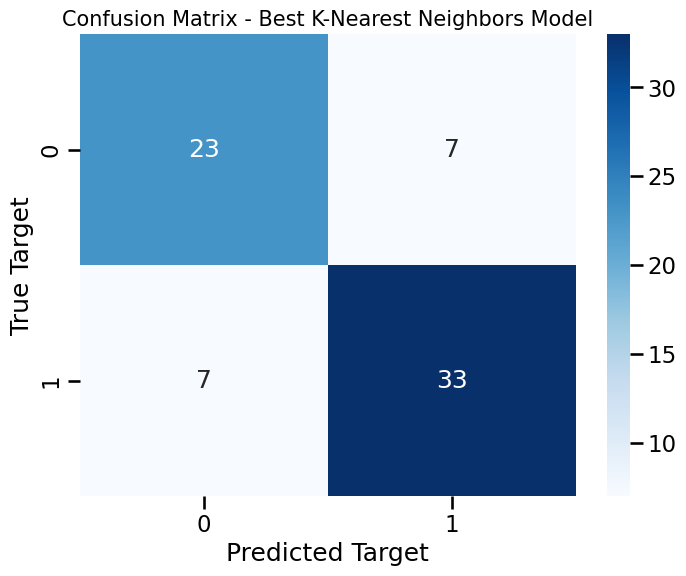

In [ ]:
print("Accuracy Score for Best Model: {:.4f}%".format(model_KNN_acc_score * 100))
print("Classification Report:")
print(classification_report(y_test,model_KNN_predicted))

#Visualisasi Confussion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(model_KNN_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Confusion Matrix - Best K-Nearest Neighbors Model", fontsize=15)
plt.xlabel("Predicted Target")
plt.ylabel("True Target")
plt.show()

**Interpretasi Confusion Matrix K-Nearest Neighbors**:

1. **Accuracy Score:** Akurasi dari model KNN adalah sebesar 80.00%. Ini menunjukkan bahwa model berhasil memprediksi kelas dengan benar sekitar 80.00% dari keseluruhan data.

2. **Classification Report:**
  - **Precision:** Presisi untuk kelas 0 (label negatif) adalah 0.77, yang berarti dari semua data yang diprediksi sebagai kelas 0, 77% adalah benar-benar kelas 0. Presisi untuk kelas 1 (label positif) adalah 0.82, yang berarti dari semua data yang diprediksi sebagai kelas 1, 82% adalah benar-benar kelas 1.
  - **Recall:** Recall untuk kelas 0 adalah 0.77, yang berarti dari semua data yang sebenarnya kelas 0, model berhasil memprediksi 77% dengan benar. Recall untuk kelas 1 adalah 0.82, yang berarti dari semua data yang sebenarnya kelas 1, model berhasil memprediksi 82% dengan benar.
  - **F1-score:** Skor F1 untuk kelas 0 adalah 0.77, yang merupakan rata-rata harmonik dari precision dan recall untuk kelas 0. Skor F1 untuk kelas 1 adalah 0.82, yang merupakan rata-rata harmonik dari precision dan recall untuk kelas 1.
  - **Support:** Jumlah sampel dalam setiap kelas.

3. **Macro Avg dan Weighted Avg:** Rata-rata dari precision, recall, dan F1-score dihitung secara independen untuk setiap kelas (macro avg), dan kemudian dibobotkan berdasarkan jumlah sampel dalam setiap kelas (weighted avg). Rata-rata dari setiap metrik dihitung untuk memberikan gambaran keseluruhan kinerja model.

Dengan demikian, hasil tersebut menunjukkan bahwa model KNN memiliki kinerja yang cukup baik dalam memprediksi kelas 0 dan kelas 1. Meskipun ada sedikit perbedaan dalam presisi dan recall antara kelas 0 dan kelas 1, namun skor F1 yang baik menunjukkan bahwa model memiliki keseimbangan yang baik antara precision dan recall untuk kedua kelas.

##Gaussian Naive Bayes

---



###Eksekusi Kode

In [ ]:
model_GNBclassifier = GaussianNB(var_smoothing=0.1)

###Cross Validation

In [ ]:
cv_scores = cross_val_score(model_GNBclassifier, X_train, y_train, cv=5)
print("Cross Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross Validation Scores: [0.80952381 0.78571429 0.87804878 0.85365854 0.7804878 ]
Mean CV Score: 0.8214866434378629


***Hasil cross-validation pada model Naive Bayes menunjukkan adanya variasi kinerja antara lipatan, dengan rentang skor akurasi dari 0,78 hingga 0,88 untuk CV=5. Meskipun demikian, rata-rata akurasi sekitar 0,82 menandakan bahwa secara keseluruhan, model dapat memberikan prediksi yang baik. Variasi ini mengindikasikan kompleksitas dalam dataset atau sensitivitas terhadap pembagian data latih-uji. Meskipun begitu, keandalan model tetap tinggi, menunjukkan bahwa Naive Bayes secara konsisten dapat memberikan prediksi yang dapat diandalkan dalam berbagai kasus penggunaan.***

###Learning Curve

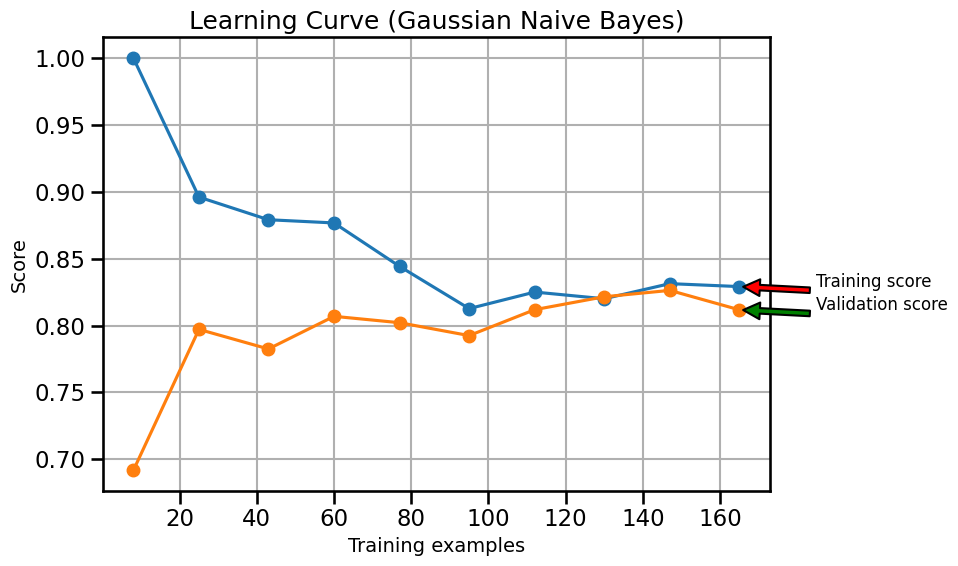

In [ ]:
def plot_learning_curve_comparison(estimator, title, X_train, y_train, X_test, y_test, ylim=None, cv=None,
                                   n_jobs=None, train_sizes=np.linspace(.05, 1.0, 10)):

    plt.figure(figsize=(10, 6))
    plt.title(title, fontsize=18)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples", fontsize=14)
    plt.ylabel("Score", fontsize=14)

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-')
    plt.plot(train_sizes, test_scores_mean, 'o-')

    # Menambahkan label di luar grafik
    plt.annotate('Training score', xy=(train_sizes[-1], train_scores_mean[-1]), xytext=(train_sizes[-1] + 20, train_scores_mean[-1]), fontsize=12,
                 arrowprops=dict(facecolor='red', shrink=0.05))
    plt.annotate('Validation score', xy=(train_sizes[-1], test_scores_mean[-1]), xytext=(train_sizes[-1] + 20, test_scores_mean[-1]), fontsize=12,
                 arrowprops=dict(facecolor='green', shrink=0.05))

    plt.tight_layout()
    return plt

# Example usage:
plot_learning_curve_comparison(model_GNBclassifier, "Learning Curve (Gaussian Naive Bayes)", X_train, y_train, X_test, y_test, cv=5)
plt.show()


***Learning curve*** pada gambar menunjukkan ***overfitting***. Hal ini terlihat dari kurva skor *training* yang lebih tinggi daripada kurva skor validasi. Seiring dengan bertambahnya data *training*, skor *training* terus meningkat dan mendekati nilai 1.

Sebaliknya, skor validasi tidak menunjukkan peningkatan yang signifikan dan bahkan cenderung menurun setelah mencapai titik optimal. Hal ini menunjukkan bahwa model mempelajari detail yang tidak relevan dari data *training* dan tidak mampu menggeneralisasi dengan baik pada data baru.

Sebagai kesimpulan, learning curve pada gambar menunjukkan bahwa model mengalami ***overfitting***.

###Confussion Matrix

In [ ]:
model_GNBclassifier.fit(X_train, y_train)
model_GNBclassifier_predicted = model_GNBclassifier.predict(X_test)

model_GNBclassifier_acc_score = accuracy_score(y_test, model_GNBclassifier_predicted)
model_GNBclassifier_conf_matrix = confusion_matrix(y_test, model_GNBclassifier_predicted)
print("Accuracy Score for Best Model: {:.4f}%".format(model_GNBclassifier_acc_score * 100))
print("Confusion Matrix:")
print(model_GNBclassifier_conf_matrix)

Accuracy Score for Best Model: 84.2857%
Confusion Matrix:
[[25  5]
 [ 6 34]]


Accuracy Score for Best Model: 84.2857%
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        30
           1       0.87      0.85      0.86        40

    accuracy                           0.84        70
   macro avg       0.84      0.84      0.84        70
weighted avg       0.84      0.84      0.84        70



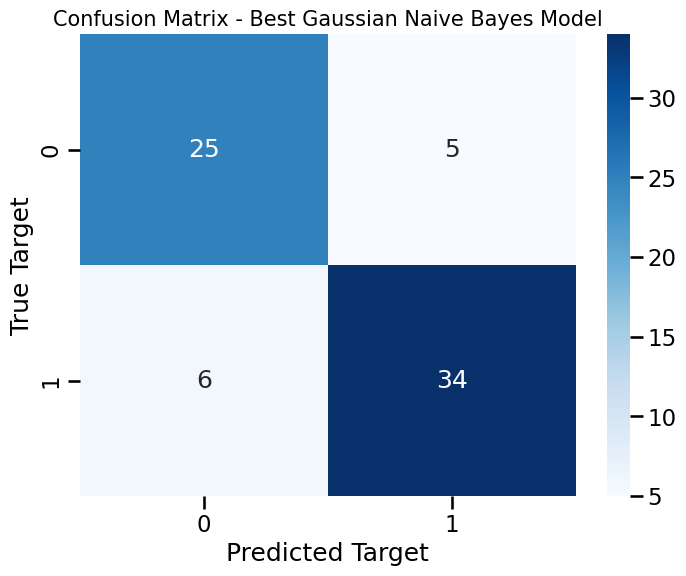

In [ ]:
print("Accuracy Score for Best Model: {:.4f}%".format(model_GNBclassifier_acc_score * 100))
print("Classification Report:")
print(classification_report(y_test,model_GNBclassifier_predicted))

#Visualisasi Confussion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(model_GNBclassifier_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Confusion Matrix - Best Gaussian Naive Bayes Model", fontsize=15)
plt.xlabel("Predicted Target")
plt.ylabel("True Target")
plt.show()

**Interpretasi Confusion Matrix Gaussian Naive Bayes**:

1. **Accuracy Score:** Akurasi dari model Gaussian Naive Bayes adalah sebesar 84.29%. Ini menunjukkan bahwa model berhasil memprediksi kelas dengan benar sekitar 84.29% dari keseluruhan data.

2. **Classification Report:**
  - **Precision:** Presisi untuk kelas 0 (label negatif) adalah 0.81, yang berarti dari semua data yang diprediksi sebagai kelas 0, 81% adalah benar-benar kelas 0. Presisi untuk kelas 1 (label positif) adalah 0.87, yang berarti dari semua data yang diprediksi sebagai kelas 1, 87% adalah benar-benar kelas 1.
  - **Recall:** Recall untuk kelas 0 adalah 0.83, yang berarti dari semua data yang sebenarnya kelas 0, model berhasil memprediksi 83% dengan benar. Recall untuk kelas 1 adalah 0.85, yang berarti dari semua data yang sebenarnya kelas 1, model berhasil memprediksi 85% dengan benar.
  - **F1-score:** Skor F1 untuk kelas 0 adalah 0.82, yang merupakan rata-rata harmonik dari precision dan recall untuk kelas 0. Skor F1 untuk kelas 1 adalah 0.86, yang merupakan rata-rata harmonik dari precision dan recall untuk kelas 1.
  - **Support:** Jumlah sampel dalam setiap kelas.

3. **Macro Avg dan Weighted Avg:** Rata-rata dari precision, recall, dan F1-score dihitung secara independen untuk setiap kelas (macro avg), dan kemudian dibobotkan berdasarkan jumlah sampel dalam setiap kelas (weighted avg). Rata-rata dari setiap metrik dihitung untuk memberikan gambaran keseluruhan kinerja model.

Dengan demikian, hasil tersebut menunjukkan bahwa model Gaussian Naive Bayes memiliki kinerja yang baik dalam memprediksi kelas 0 dan kelas 1. Dengan akurasi yang tinggi dan nilai precision serta recall yang seimbang untuk kedua kelas, model ini dapat diandalkan untuk memberikan prediksi yang baik dalam berbagai kasus penggunaan.

##Model Comparison

In [ ]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Random Forest', 'Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbour',
                                 'Gaussian Naive Bayes'],
                       'Best Model Accuracy': [model_acc_score*100, model_svc_acc_score*100, model_lr_acc_score*100, model_KNN_acc_score*100, model_GNBclassifier_acc_score*100]})

# Sort the DataFrame by accuracy in descending order
compare_sorted = compare.sort_values(by='Best Model Accuracy', ascending=False)

# Create styled DataFrame without index
styled_compare = compare_sorted.style.background_gradient(cmap='jet')


# Set font properties for table headers
styled_compare.set_table_styles([{'selector': 'th', 'props': [('font-family', 'Segoe UI')]}])

,Model,Best Model Accuracy
4,Gaussian Naive Bayes,84.285714
0,Random Forest,82.857143
1,Support Vector Machine,81.428571
2,Logistic Regression,80.000000
3,K-Nearest Neighbour,80.000000


Dari hasil **perbandingan model** dari kelima model tersebut, dengan membandingkan tingkat akurasi yang diperoleh dari matriks kebingungan (confusion matrix), didapati bahwa tingkat akurasi tertinggi terdapat pada model **Gaussian Naive Bayes**, mencapai tingkat akurasi sebesar **84,28%**. Dari hasil perbandingan ini, dipilihlah model **Gaussian Naive Bayes** sebagai model dengan tingkat akurasi tertinggi. Selanjutnya, dilakukan proses penyetelan hyperparameter (*hyperparameter tuning*) untuk mencari parameter terbaik dari model yang telah dipilih.

##Hyperparameter Tunning

In [ ]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Buat objek GridSearchCV
grid_search_Gaussian = GridSearchCV(estimator=model_GNBclassifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Lakukan fitting grid search pada data
grid_search_Gaussian.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search_Gaussian.best_params_

# Dapatkan skor terbaik
best_score = grid_search_Gaussian.best_score_

print("Best Parameters:", best_params)
print("Best CV Score:", best_score)

Best Parameters: {'var_smoothing': 0.03511191734215131}
Best CV Score: 0.8358885017421602


**Hasil Output:**

  - Best Parameters: Var Smoothing=0.035

  - Best CV Score: 0.835

**Interpretasi:**

Hasil dari hyperparameter tuning untuk model **Gaussian Naive Bayes** menunjukkan bahwa parameter terbaik yang ditemukan adalah `var_smoothing` dengan nilai sekitar **0.035**. Nilai ini mengindikasikan seberapa banyak smoothing yang diterapkan pada perkiraan varians fitur selama pelatihan model. Dengan menggunakan nilai `var_smoothing` ini, model Naive Bayes mampu mencapai skor validasi silang **(CV Score)** sebesar **83.59%**. Skor validasi ini mencerminkan seberapa baik model dapat menggeneralisasi pola dari data yang tidak terlihat sebelumnya. Dengan demikian, hasil tuning hyperparameter menunjukkan bahwa nilai `var_smoothing` yang **optimal** adalah sekitar **0.035**, yang menghasilkan model Gaussian Naive Bayes dengan kinerja yang memuaskan dalam melakukan klasifikasi pada dataset yang diberikan.





##Bootstraping

In [ ]:
from sklearn.utils import resample

# Jumlah bootstrap yang diinginkan
num_bootstrap_samples = 100

# Simpan hasil penyetelan hyperparameter dan evaluasi model
bootstrap_scores = []

# Lakukan bootstraping
for _ in range(num_bootstrap_samples):
    # Lakukan resampling pada data pelatihan
    X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train)

    # Lakukan penyetelan hyperparameter menggunakan resampled data
    grid_search_Gaussian.fit(X_train_bootstrap, y_train_bootstrap)

    # Simpan skor terbaik dari hasil penyetelan hyperparameter
    bootstrap_scores.append(grid_search_Gaussian.best_score_)

# Hitung rata-rata skor bootstrap
mean_bootstrap_score = np.mean(bootstrap_scores)
std_bootstrap_score = np.std(bootstrap_scores)

print("Mean Bootstrap Score:", mean_bootstrap_score)
print("Standard Deviation Bootstrap Score:", std_bootstrap_score)

Mean Bootstrap Score: 0.8326283391405341
Standard Deviation Bootstrap Score: 0.032225405940935384


**Interpretasi hasil bootstraping:**

1. **Mean Bootstrap Score (Skor Bootstrap Rata-rata)**: Nilai ini menunjukkan rata-rata dari skor yang diperoleh dari penyetelan hyperparameter menggunakan bootstraping. Dalam konteks ini, mean bootstrap score adalah sekitar 0.8326. Artinya, rata-rata performa model yang dihasilkan dari berbagai kombinasi hyperparameter adalah sekitar 83.26%.

2. **Standard Deviation Bootstrap Score (Standar Deviasi Skor Bootstrap)**: Standar deviasi mengukur seberapa jauh skor-skor bootstrap tersebar dari nilai rata-ratanya. Nilai standar deviasi sebesar 0.0322 menunjukkan bahwa skor-skor bootstrap cenderung berkisar sekitar 0.0322 dari nilai rata-ratanya. Semakin kecil nilai standar deviasi, semakin stabil atau konsisten model dalam performanya.

Dengan demikian, hasil ini menunjukkan bahwa model yang dihasilkan dari penyetelan hyperparameter menggunakan bootstraping memiliki performa yang stabil, dengan rata-rata skor sekitar 83.26% dan variasi yang relatif kecil dari rata-rata tersebut. Ini memberikan keyakinan tambahan dalam keandalan model dalam memprediksi data yang belum pernah dilihat sebelumnya.

##Testing Data

In [ ]:
testing_data = {'age': [60],
    'sex': [1],         # (0: perempuan, 1: laki-laki)
    'cp': [3],          # Jenis nyeri dada (0-3)
    'trestbps': [130],  # Tekanan darah istirahat (mm Hg)
    'chol': [150],      # Kolesterol serum total (mg/dl)
    'fbs': [0],         # Gula darah puasa > 120 mg/dl (1: true, 0: false)
    'restecg': [0],     # Elektrokardiografi istirahat (0-2)
    'thalach': [125],   # Detak jantung maksimum yang tercapai
    'exang': [0],       # Angina yang diinduksi oleh latihan (1: yes, 0: no)
    'oldpeak': [1],     # Depresi ST relatif terhadap latihan sebelumnya
    'slope': [1],       # Kemiringan segmen ST latihan terhadap istirahat
    'ca': [0],          # Jumlah pembuluh darah utama yang diwarnai oleh flourosopy (0-3)
    'thal': [1],        # Thallium stress test (1-3)
}

testing_data = pd.DataFrame(testing_data)
testing_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,60,1,3,130,150,0,0,125,0,1,1,0,1


In [ ]:
scaled_testdata = scaler.transform(testing_data)
y_pred_new = grid_search_Gaussian.best_estimator_.predict(scaled_testdata)

print("Diagnosis : ", end="")
if y_pred_new == 1:
    print("Memiliki Penyakit Jantung")
else:
    print("Tidak Memiliki Penyakit Jantung")

Diagnosis : Memiliki Penyakit Jantung
